In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bar_chart_race as bcr

In [2]:
df_full = pd.read_csv('data/tweets_users_feb_21.csv', parse_dates=['date'])
df_user = pd.read_csv('data/user_data.csv')

In [3]:
df_full['year'] = df_full['date'].dt.year
df_full['month'] = df_full['date'].dt.month
df_full['day'] = df_full['date'].dt.day

In [4]:
df_full.shape

(1729, 38)

In [5]:
df_full.head().T

,0,1,2,3,4
url_x,https://twitter.com/LaydenRobinson/status/1360...,https://twitter.com/LizWilcox79/status/1359270...,https://twitter.com/PodRevDay/status/135915938...,https://twitter.com/KidsWatching/status/135907...,https://twitter.com/PodRevDay/status/135907664...
date,2021-02-12 03:22:52+00:00,2021-02-09 22:37:19+00:00,2021-02-09 15:17:04+00:00,2021-02-09 09:58:08+00:00,2021-02-09 09:48:17+00:00
content,"Check out and listen to @AlanMcGill14 awesome,...","""How's February treating you so far?"" you ask....",You can get #podrevday reminders and info in y...,"#podrevday - love these guys, loved their take...",wow #podrevday yesterday was unreal!\n\nWill r...
renderedContent,"Check out and listen to @AlanMcGill14 awesome,...","""How's February treating you so far?"" you ask....",You can get #podrevday reminders and info in y...,"#podrevday - love these guys, loved their take...",wow #podrevday yesterday was unreal!\n\nWill r...
id_x,1360066816240881668,1359270180212232192,1359159386489425932,1359079124292276224,1359076645492166659
user,"{'username': 'LaydenRobinson', 'displayname': ...","{'username': 'LizWilcox79', 'displayname': 'El...","{'username': 'PodRevDay', 'displayname': 'PodR...","{'username': 'KidsWatching', 'displayname': 'K...","{'username': 'PodRevDay', 'displayname': 'PodR..."
outlinks,['https://cryinthemoonslight.podbean.com/'],[],['http://www.podrevday.com'],[],['http://www.podrevday.com']
tcooutlinks,['https://t.co/BUhTwtMtpw'],[],['https://t.co/oet2vmUjAb'],[],['https://t.co/oet2vmUjAb']
replyCount,0,1,0,0,0
retweetCount,1,0,2,1,0


In [6]:
df_full.shape

(1729, 38)

In [7]:
df_full = df_full.drop_duplicates()

In [8]:
df_full.shape

(1729, 38)

In [9]:
df_full.username.value_counts()[:10]

stephfuccio       246
PodRevDay         211
OracleofDusk       78
musciguy           75
Podchaser          46
LizWilcox79        46
Infectious_Pod     25
sakeriver          22
ODParlayHour       20
DimensionPod       18
Name: username, dtype: int64

In [10]:
screen = ['PodRevDay', 'stephfuccio']

df_full = df_full[~df_full.username.isin(screen)]

In [11]:
df_full.username.value_counts()[:10]

OracleofDusk      78
musciguy          75
LizWilcox79       46
Podchaser         46
Infectious_Pod    25
sakeriver         22
ODParlayHour      20
DimensionPod      18
FitVeritas        17
garethsounds      17
Name: username, dtype: int64

In [12]:
tweet_table = df_full.groupby('username').size().reset_index(name="tweets")
tweets_total = df_full.shape[0]
unique_users = df_full["username"].nunique()
sum_followers = sum(df_user.followersCount)
unique_countries = df_full.country.nunique()
median_tweet = np.median(tweet_table.tweets)
avg_retweats = np.mean(df_full.retweetCount)
avg_favorite = np.mean(df_full.likeCount)
print(f"{tweets_total}: Tweets using the hashtag #PodRevDay.")
print(f"{unique_users}: People have participated in #PodRevDay.")
print(f"{sum_followers:,d}: Followers of participants in #PodRevDay.")
print(f"{unique_countries}: Minimum number of countries with participants.")
print(f"{avg_favorite:.2f}: Average Number of people liking a tweet about #PodRevDay")
print(f"{avg_retweats:.2f}: Average retweets per tweet about #PodRevDay")
print(f"{median_tweet:.0f}: Median number of tweets per user.")

1272: Tweets using the hashtag #PodRevDay.
399: People have participated in #PodRevDay.
737,906: Followers of participants in #PodRevDay.
18: Minimum number of countries with participants.
6.47: Average Number of people liking a tweet about #PodRevDay
2.47: Average retweets per tweet about #PodRevDay
1: Median number of tweets per user.


In [13]:
#!mkdir plots

In [14]:
df_full.head()

,url_x,date,content,renderedContent,id_x,user,outlinks,tcooutlinks,replyCount,retweetCount,...,url_y,verified,geotext,city,country,name,iso3,year,month,day
0,https://twitter.com/LaydenRobinson/status/1360...,2021-02-12 03:22:52+00:00,"Check out and listen to @AlanMcGill14 awesome,...","Check out and listen to @AlanMcGill14 awesome,...",1360066816240881668,"{'username': 'LaydenRobinson', 'displayname': ...",['https://cryinthemoonslight.podbean.com/'],['https://t.co/BUhTwtMtpw'],0,1,...,https://twitter.com/LaydenRobinson,False,<geotext.geotext.GeoText object at 0x7fc5a2927...,San Diego,United States,United States,USA,2021,2,12
1,https://twitter.com/LizWilcox79/status/1359270...,2021-02-09 22:37:19+00:00,"""How's February treating you so far?"" you ask....","""How's February treating you so far?"" you ask....",1359270180212232192,"{'username': 'LizWilcox79', 'displayname': 'El...",[],[],1,0,...,https://twitter.com/LizWilcox79,False,<geotext.geotext.GeoText object at 0x7fc5a2927...,Tempe,United States,United States,USA,2021,2,9
3,https://twitter.com/KidsWatching/status/135907...,2021-02-09 09:58:08+00:00,"#podrevday - love these guys, loved their take...","#podrevday - love these guys, loved their take...",1359079124292276224,"{'username': 'KidsWatching', 'displayname': 'K...",[],[],0,1,...,https://twitter.com/KidsWatching,False,<geotext.geotext.GeoText object at 0x7fc5a2927...,NaN,NaN,NaN,NaN,2021,2,9
6,https://twitter.com/StoriesSandman/status/1359...,2021-02-09 08:09:46+00:00,Check out my ⭐️⭐️⭐️⭐️⭐️ review of The History ...,Check out my ⭐️⭐️⭐️⭐️⭐️ review of The History ...,1359051854827540481,"{'username': 'StoriesSandman', 'displayname': ...",['https://www.podchaser.com/podcasts/the-histo...,['https://t.co/AztL1IEA2N'],0,1,...,https://twitter.com/StoriesSandman,False,<geotext.geotext.GeoText object at 0x7fc5a2927...,NaN,NaN,NaN,NaN,2021,2,9
7,https://twitter.com/willkee/status/13589795215...,2021-02-09 03:22:21+00:00,Check out my ⭐️⭐️⭐️⭐️⭐️ review of @YuDiveDeep ...,Check out my ⭐️⭐️⭐️⭐️⭐️ review of @YuDiveDeep ...,1358979521505095683,"{'username': 'willkee', 'displayname': 'Willia...",['https://www.podchaser.com/podcasts/yu-dive-d...,['https://t.co/tf1QaMqBDa'],1,2,...,https://twitter.com/willkee,False,<geotext.geotext.GeoText object at 0x7fc5a2927...,NaN,Canada,Canada,CAN,2021,2,9


## Track Growth Over Time

### Tweets By Month

In [15]:
#Create a frequency table of the number of tweets per month
tweets_per_month = df_full[['year', 'month']].value_counts().sort_index()

In [16]:
#Fill in the frequency table so there aren't blank cells
tweets_per_month = pd.DataFrame(tweets_per_month)
tweets_per_month = tweets_per_month.reset_index()
tweets_per_month.columns = ['year', 'month', 'count']

In [17]:
#Add a running total 
tweets_per_month['overall'] = tweets_per_month['count'].cumsum()
tweets_per_month

,year,month,count,overall
0,2020,2,170,170
1,2020,3,69,239
2,2020,4,51,290
3,2020,5,51,341
4,2020,6,94,435
5,2020,7,100,535
6,2020,8,169,704
7,2020,9,89,793
8,2020,10,95,888
9,2020,11,90,978


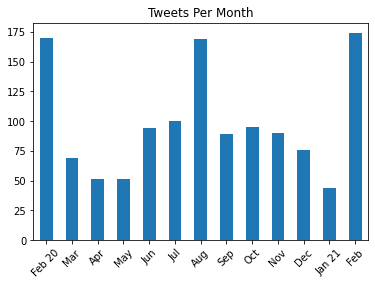

In [18]:
ax = (tweets_per_month.loc[:, ["month", 'count']]
                      .plot
                      .bar(x='month', 
                           title = "Tweets Per Month", 
                           legend=False));

months = ('Feb 20', "Mar", "Apr", 'May', "Jun", "Jul", 'Aug', "Sep", "Oct", "Nov", "Dec", "Jan 21", "Feb")
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)


plt.xticks(positions, months, rotation=45);
plt.xlabel("");

ax.figure.savefig('plots/tweets_per_month.png');

### Tweets By Day

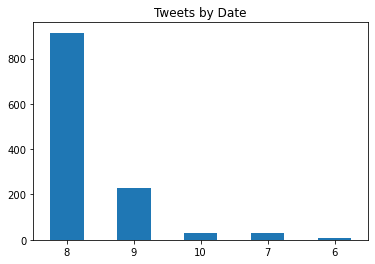

In [19]:
tweets_per_day = df_full.groupby('day').count().sort_values('month', ascending=False).reset_index()
ax2=tweets_per_day.head(5).plot.bar(x='day',
                                y='date',
                                title="Tweets by Date",
                                legend=None)
plt.xticks(rotation='horizontal')
plt.xlabel("");
ax2.figure.savefig('plots/tweets_by_date.png')

### Retweets per Month

In [20]:
retweets_per_month = df_full.groupby(['year','month'])['retweetCount'].sum().reset_index()
#Fill in the frequency table so there aren't blank cells
retweets_per_month = pd.DataFrame(retweets_per_month)
retweets_per_month.columns = ['year', 'month', 'count']

In [21]:
retweets_per_month

,year,month,count
0,2020,2,529
1,2020,3,175
2,2020,4,113
3,2020,5,126
4,2020,6,225
5,2020,7,278
6,2020,8,398
7,2020,9,195
8,2020,10,224
9,2020,11,146


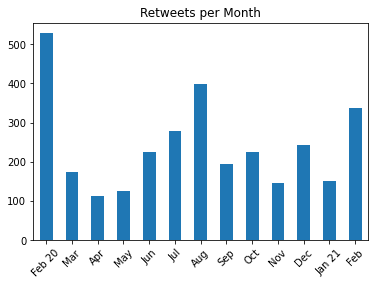

In [22]:
ax3 = (retweets_per_month.loc[:, ['month', 'count']]
                         .plot
                         .bar(x='month',
                              legend=False,
                              title="Retweets per Month"))

plt.xticks(positions, months, rotation=45);
plt.xlabel("");

ax3.figure.savefig('plots/retweets_per_month.png')

## Favorites Per Month

In [23]:
retweets_per_month = df_full.groupby(['year','month'])['retweetCount'].sum().reset_index()
#Fill in the frequency table so there aren't blank cells
retweets_per_month = pd.DataFrame(retweets_per_month)
retweets_per_month.columns = ['year', 'month', 'count']

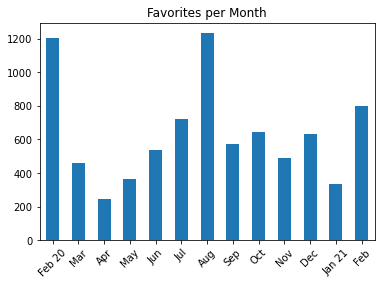

In [24]:
favorites_per_month = df_full.groupby(['year','month'])['likeCount'].sum().sort_index(ascending=True)
ax4 = favorites_per_month.plot.bar(title='Favorites per Month')
plt.xticks(positions, months, rotation=45);
plt.xlabel("");
ax4.figure.savefig('plots/favorites_per_month.png')

## Participants by Country

In [25]:
table = df_full.groupby(['year','month','country']).size().reset_index(name="counts")
table['total'] = table.groupby(['country'])['counts'].cumsum()
table['country'] = table.country.replace("PolandSerbia", "Poland")

In [26]:
table['country'].plot

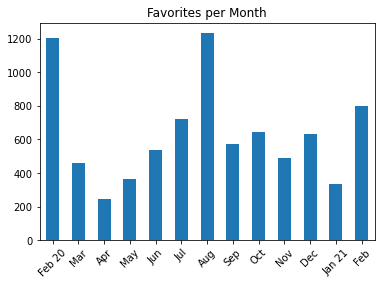

In [27]:
ax4 = favorites_per_month.plot.bar(title='Favorites per Month')
plt.xticks(positions, months, rotation=45);
plt.xlabel("");
ax4.figure.savefig('plots/favorites_per_month.png')

In [28]:
table_wide = table.pivot(index=['year', 'month'], columns=['country'], values=['total']).fillna(method='ffill', axis=0).reset_index()
table_wide.fillna(0, inplace=True)

In [29]:
table_wide.reset_index()

index  year month     total                                            \
country                   Australia Canada Ecuador France Germany India Italy   
0           0  2020     2       5.0    5.0     0.0    0.0     1.0   0.0   6.0   
1           1  2020     3       5.0    5.0     1.0    0.0     1.0   0.0   6.0   
2           2  2020     4       6.0    5.0     1.0    0.0     1.0   0.0   6.0   
3           3  2020     5       6.0    6.0     1.0    0.0     2.0   1.0   6.0   
4           4  2020     6       6.0    7.0     1.0    0.0     3.0   2.0   6.0   
5           5  2020     7       6.0    9.0     1.0    1.0     5.0   2.0   6.0   
6           6  2020     8       6.0   20.0     1.0    1.0     5.0   2.0   9.0   
7           7  2020     9       6.0   24.0     1.0    1.0     5.0   2.0   9.0   
8           8  2020    10       6.0   24.0     1.0    1.0     5.0   2.0   9.0   
9           9  2020    11       6.0   31.0     1.0    1.0     5.0   2.0   9.0   
10         10  2020    12       6.0   37.0     1.0    1.0     7.0   2.0   9.0   
11         11  2021     1       6.0   38.0     1.0    1.0     7.0   2.0   9.0   
12         12  2021     2       6.0   50.0     1.0    1.0     7.0   2.0   9.0   

         ...                                                 \
country  ... New Zealand Nigeria Poland Serbia Spain Sweden   
0        ...         3.0     0.0    0.0    0.0   0.0    0.0   
1        ...         3.0     0.0    0.0    0.0   0.0    0.0   
2        ...         3.0     0.0    0.0    0.0   0.0    0.0   
3        ...         3.0     0.0    0.0    0.0   0.0    0.0   
4        ...         3.0     3.0    0.0    0.0   0.0    0.0   
5        ...         3.0     4.0    2.0    0.0   5.0    0.0   
6        ...         3.0     4.0    4.0    1.0   5.0    2.0   
7        ...         3.0     4.0    4.0    2.0   7.0    2.0   
8        ...         3.0     4.0    4.0    2.0  11.0    2.0   
9        ...         3.0     4.0    4.0    2.0  11.0    2.0   
10       ...         3.0     4.0    4.0    2.0  11.0    2.0   
11       ...         3.0     4.0    4.0    2.0  11.0    3.0   
12       ...         3.0     4.0    4.0    2.0  11.0    3.0   

                                                                   
country United Arab Emirates United Kingdom United States Vietnam  
0                        0.0           13.0          75.0     1.0  
1                        0.0           20.0         114.0     1.0  
2                        0.0           24.0         139.0     1.0  
3                        0.0           32.0         166.0     1.0  
4                        0.0           46.0         212.0     1.0  
5                        0.0           56.0         251.0     1.0  
6                        3.0           59.0         341.0     1.0  
7                        3.0           63.0         387.0     1.0  
8                        3.0           71.0         413.0     1.0  
9                        3.0           91.0         451.0     1.0  
10                       3.0           97.0         483.0     1.0  
11                       3.0          104.0         494.0     1.0  
12                       3.0          111.0         560.0     1.0  

[13 rows x 21 columns]

In [30]:
original_names = table_wide.columns
_ , country_names = zip(*original_names)
table_wide.columns = country_names

In [31]:
table_wide = pd.concat([table_wide]*2)
table_wide.sort_index(inplace=True)

In [32]:
table_wide.columns

Index(['', '', 'Australia', 'Canada', 'Ecuador', 'France', 'Germany', 'India',
       'Italy', 'Malaysia', 'New Zealand', 'Nigeria', 'Poland', 'Serbia',
       'Spain', 'Sweden', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Vietnam'],
      dtype='object')

In [33]:
table_wide.columns.values[[0, 1]] = ['year', 'month']

In [34]:
table_wide

,year,month,Australia,Canada,Ecuador,France,Germany,India,Italy,Malaysia,New Zealand,Nigeria,Poland,Serbia,Spain,Sweden,United Arab Emirates,United Kingdom,United States,Vietnam
0,2020,2,5.0,5.0,0.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,75.0,1.0
0,2020,2,5.0,5.0,0.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,75.0,1.0
1,2020,3,5.0,5.0,1.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,114.0,1.0
1,2020,3,5.0,5.0,1.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,114.0,1.0
2,2020,4,6.0,5.0,1.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,139.0,1.0
2,2020,4,6.0,5.0,1.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,139.0,1.0
3,2020,5,6.0,6.0,1.0,0.0,2.0,1.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,166.0,1.0
3,2020,5,6.0,6.0,1.0,0.0,2.0,1.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,166.0,1.0
4,2020,6,6.0,7.0,1.0,0.0,3.0,2.0,6.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,46.0,212.0,1.0
4,2020,6,6.0,7.0,1.0,0.0,3.0,2.0,6.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,46.0,212.0,1.0


In [35]:
mon_num = list(range(1,13))
mon_names = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

months_dic = dict(zip(mon_num, mon_names))
# df['col1'].replace(di, inplace=True)
table_wide['month'] = table_wide['month'].replace(months_dic)
table_wide

,year,month,Australia,Canada,Ecuador,France,Germany,India,Italy,Malaysia,New Zealand,Nigeria,Poland,Serbia,Spain,Sweden,United Arab Emirates,United Kingdom,United States,Vietnam
0,2020,February,5.0,5.0,0.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,75.0,1.0
0,2020,February,5.0,5.0,0.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,75.0,1.0
1,2020,March,5.0,5.0,1.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,114.0,1.0
1,2020,March,5.0,5.0,1.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,114.0,1.0
2,2020,April,6.0,5.0,1.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,139.0,1.0
2,2020,April,6.0,5.0,1.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,139.0,1.0
3,2020,May,6.0,6.0,1.0,0.0,2.0,1.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,166.0,1.0
3,2020,May,6.0,6.0,1.0,0.0,2.0,1.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,166.0,1.0
4,2020,June,6.0,7.0,1.0,0.0,3.0,2.0,6.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,46.0,212.0,1.0
4,2020,June,6.0,7.0,1.0,0.0,3.0,2.0,6.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,46.0,212.0,1.0


In [36]:
table_wide['month_year'] = table_wide['month']+" "+table_wide['year'].astype(str)
table_wide = table_wide.drop(columns=['month', 'year'])

In [37]:
table_wide.set_index('month_year')

,Australia,Canada,Ecuador,France,Germany,India,Italy,Malaysia,New Zealand,Nigeria,Poland,Serbia,Spain,Sweden,United Arab Emirates,United Kingdom,United States,Vietnam
month_year,,,,,,,,,,,,,,,,,,
February 2020,5.0,5.0,0.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,75.0,1.0
February 2020,5.0,5.0,0.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,75.0,1.0
March 2020,5.0,5.0,1.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,114.0,1.0
March 2020,5.0,5.0,1.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,114.0,1.0
April 2020,6.0,5.0,1.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,139.0,1.0
April 2020,6.0,5.0,1.0,0.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,139.0,1.0
May 2020,6.0,6.0,1.0,0.0,2.0,1.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,166.0,1.0
May 2020,6.0,6.0,1.0,0.0,2.0,1.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,166.0,1.0
June 2020,6.0,7.0,1.0,0.0,3.0,2.0,6.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,46.0,212.0,1.0
